In [1]:
import pandas as pd
import re

csv_file = 'olympics.csv'
oly = pd.read_csv(csv_file,index_col=0,skiprows=1)
oly.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [2]:
len(oly.columns)

15

In [15]:
#print(oly.index)
f_lst = [i[i.find('(')+1 : i.find(')')] for i in oly.index]  #finding code within the brackets and storing in a list
print(f_lst)

['AFG', 'ALG', 'ARG', 'ARM', 'ANZ', 'AUS', 'AUT', 'AZE', 'BAH', 'BRN', 'BAR', 'BLR', 'BEL', 'BER', 'BOH', 'BOT', 'BRA', 'BWI', 'BUL', 'BDI', 'CMR', 'CAN', 'CHI', 'CHN', 'COL', 'CRC', 'CIV', 'CRO', 'CUB', 'CYP', 'CZE', 'TCH', 'DEN', 'DJI', 'DOM', 'ECU', 'EGY', 'ERI', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GEO', 'GER', 'EUA', 'GDR', 'FRG', 'GHA', 'GBR', 'GRE', 'GRN', 'GUA', 'GUY', 'HAI', 'HKG', 'HUN', 'ISL', 'IND', 'INA', 'IRI', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN', 'PRK', 'KOR', 'KUW', 'KGZ', 'LAT', 'LIB', 'LIE', 'LTU', 'LUX', 'MKD', 'MAS', 'MRI', 'MEX', 'MDA', 'MGL', 'MNE', 'MAR', 'MOZ', 'NAM', 'NED', 'AHO', 'NZL', 'NIG', 'NGR', 'NOR', 'PAK', 'PAN', 'PAR', 'PER', 'PHI', 'POL', 'POR', 'PUR', 'QAT', 'ROU', 'RUS', 'RU1', 'URS', 'EUN', 'KSA', 'SEN', 'SRB', 'SCG', 'SIN', 'SVK', 'SLO', 'RSA', 'ESP', 'SRI', 'SUD', 'SUR', 'SWE', 'SUI', 'SYR', 'TPE', 'TJK', 'TAN', 'THA', 'TOG', 'TGA', 'TRI', 'TUN', 'TUR', 'UGA', 'UKR', 'UAE', 'USA', 'URU', 'UZB', 'VEN', 'VIE', 'ISV', 'YUG', 'IOP'

In [4]:
oly['Combined total']

Afghanistan (AFG)                                   2
Algeria (ALG)                                      15
Argentina (ARG)                                    70
Armenia (ARM)                                      12
Australasia (ANZ) [ANZ]                            12
                                                ...  
Independent Olympic Participants (IOP) [IOP]        3
Zambia (ZAM) [ZAM]                                  2
Zimbabwe (ZIM) [ZIM]                                8
Mixed team (ZZX) [ZZX]                             17
Totals                                          17579
Name: Combined total, Length: 147, dtype: int64

In [5]:
oly['Combined total'][:-1].max()

2681

In [6]:
oly['Combined total'][:-1].min()

1

In [7]:
oly[:-1].max()

№ Summer            27
01 !               976
02 !               757
03 !               666
Total             2399
№ Winter            22
01 !.1             118
02 !.1             111
03 !.1             100
Total.1            329
№ Games             49
01 !.2            1072
02 !.2             859
03 !.2             750
Combined total    2681
dtype: int64

In [8]:
oly[:-1].min()

№ Summer          1
01 !              0
02 !              0
03 !              0
Total             0
№ Winter          0
01 !.1            0
02 !.1            0
03 !.1            0
Total.1           0
№ Games           1
01 !.2            0
02 !.2            0
03 !.2            0
Combined total    1
dtype: int64

In [15]:
#to add new column with country codes present in index

l1 = []

for x in oly.index:
    l1.append(re.findall(r"\[.*\]|\(.*\)*", x))

#oly['country'] = l1
#print(l1)

In [9]:
# above code reduced to one line

oly['country'] =["".join(re.findall(r"\[.*\]|\(.*\)*", x)) for x in oly.index]

In [10]:
oly.tail(30)



,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total,country
Sri Lanka (SRI) [SRI],16,0,2,0,2,0,0,0,0,0,16,0,2,0,2,(SRI) [SRI]
Sudan (SUD),11,0,1,0,1,0,0,0,0,0,11,0,1,0,1,(SUD)
Suriname (SUR) [E],11,1,0,1,2,0,0,0,0,0,11,1,0,1,2,(SUR) [E]
Sweden (SWE) [Z],26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,(SWE) [Z]
Switzerland (SUI),27,47,73,65,185,22,50,40,48,138,49,97,113,113,323,(SUI)
Syria (SYR),12,1,1,1,3,0,0,0,0,0,12,1,1,1,3,(SYR)
Chinese Taipei (TPE) [TPE] [TPE2],13,2,7,12,21,11,0,0,0,0,24,2,7,12,21,(TPE) [TPE] [TPE2]
Tajikistan (TJK),5,0,1,2,3,4,0,0,0,0,9,0,1,2,3,(TJK)
Tanzania (TAN) [TAN],12,0,2,0,2,0,0,0,0,0,12,0,2,0,2,(TAN) [TAN]
Thailand (THA),15,7,6,11,24,3,0,0,0,0,18,7,6,11,24,(THA)


In [156]:
len(oly['country'])

147

In [132]:
oly['country'][5]

'(AUS) [AUS] [Z]'

In [175]:
df =oly.country.apply(lambda z: pd.Series(str(z).split(" ")))
len(df.columns)


5

In [108]:
game = [oly['№ Games'][i] for i in oly['№ Games']]
len(game)

147

In [118]:
summr = [oly['№ Summer'][j] for j in oly['№ Summer']]
len(summr)

147

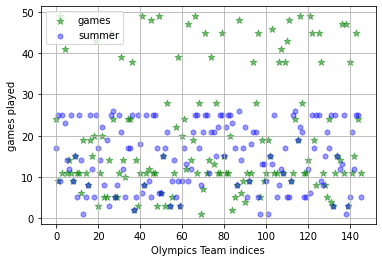

In [62]:
import matplotlib.pyplot as plt


games = [oly['№ Games'][i] for i in oly['№ Games'][:-1]]
summer = [oly['№ Summer'][j] for j in oly['№ Summer'][:-1]]


x =[i for i in range(0,146)]

plt.scatter(x, games,s=50,alpha=0.5,marker='*',c='green')
plt.scatter(x, summer,s=30,alpha=0.4,marker='h',c='blue')

plt.xlabel('Olympics Team indices')
plt.ylabel('games played')

plt.legend(labels=['games','summer'],loc='upper left')
plt.grid(True)

plt.show()

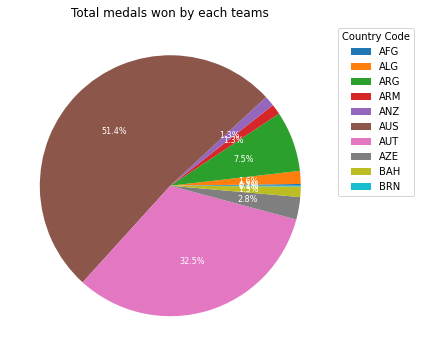

In [20]:
fig = plt.figure(figsize = (18, 6))
ax3 = fig.add_subplot()

ax3.pie(oly['Combined total'][:10], labels = f_lst[:10], autopct = '%1.1f%%',textprops = {'fontsize': 8, 'color' : "white"})
ax3.set_title("Total medals won by each teams")
ax3.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Country Code")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B76B727F10>]],
      dtype=object)

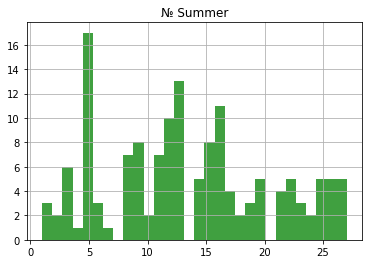

In [75]:
oly.hist(column = '№ Summer',bins=30, facecolor='g', alpha=0.75)